# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Run this cell for plotting.

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

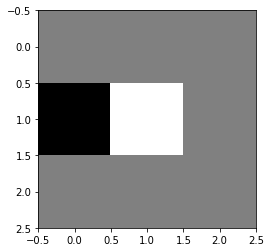

In [75]:
a = np.array([
    [0,0,0],
    [-1,1,0],
    [0,0,0],
])
plt.imshow(a , cmap='gray')

# PART 3

**Point : 35 pts**

## Erosion

In [ ]:
def erosion(img , str_elem):
  c = signal.convolve2d(str_elem , img )

  height = img.shape[0] 
  width = img.shape[1] 

  return np.where(c==5 , 1 , 0)[1:height + 1 , 1:width + 1]

In [ ]:
# check erosion
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,1,0,0],
    [1,1,1,0],
    [0,1,0,0],
    [0,0,1,0]
])

erosion(g , str_elem)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

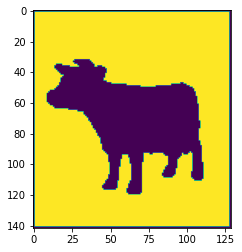

In [ ]:
img  = cv2.imread("/content/img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_threshed = np.where(img > 128 , 1 , 0)

str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

plt.imshow(erosion(img_threshed , str_elem).astype('uint8'))

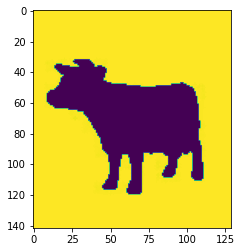

In [ ]:
plt.imshow(cv2.erode(img ,str_elem.astype('uint8') , iterations=1))

## Dilation

In [ ]:
def dilation(img , str_elem):
  c = signal.convolve2d(str_elem , img)

  height = img.shape[0] 
  width = img.shape[1] 

  return np.where(c>0 , 1 , 0)[1:height + 1 , 1:width + 1]

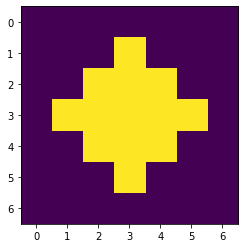

In [ ]:
# check dilation
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
])

plt.imshow(dilation(g , str_elem))

## Opening

In [ ]:
def opening(img , str_elem):
  erode = dilation(img , str_elem)
  return erosion(erode , str_elem)

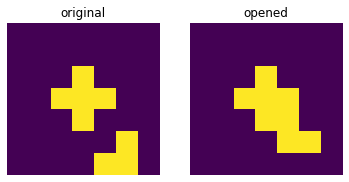

In [ ]:
  # check opening
str_elem = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
])

g = np.array([
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,1,1,1,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0],
    [0,0,0,0,1,1,0],
])

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(g)
axarr[0].set_title("original")
axarr[0].axis('off')

axarr[1].imshow(opening(g , str_elem))
axarr[1].set_title("opened")
axarr[1].axis('off')

plt.show()

## Skeleton

In [ ]:
def get_k(img , str_element):
  k = 1
  while erosion(image, str_element):
      k += 1
  return k

In [ ]:
# Test get_K
img  = cv2.imread("/content/img4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img.shape

(142, 129)

In [ ]:
# test subraction
openned = np.array([
    [0,0,1,0,0],
    [0,1,1,1,0],
    [0,1,0,1,0],
    [0,1,0,1,0],
    [0,0,0,0,0],
])

erode = np.array([
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,1,1,1,0],
    [0,1,0,1,0],
    [0,0,0,0,0],
])

a = erode - openned
np.where(a >=0 , a , 0)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

112


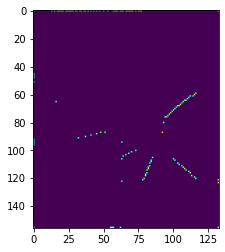

In [25]:
def find_skeleton(img):
  str_element = np.array([
      [0,1,0],
      [1,1,1],
      [0,1,0],
  ], dtype = np.uint8)

  K = get_k(img , str_element)
  union = np.zeros_like(img)

  img_threshed = np.where(img > 128 , 1 , 0).astype(np.uint8)

  ab = np.uint8(img_threshed.copy())

  for i in range(K):
    erode = erosion(img_threshed,str_element)
    for j in range(K-1):
      erode = erosion(erode,str_element)

    openned = opening(erode,str_element)
    a = erode - openned
    leftovers = np.where(a >=0 , a , 0)
    union = np.maximum(union, leftovers)

  return union

img  = cv2.imread("/content/img2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(find_skeleton(img))

Implement this function to get the input image and return the skeleton of the input image.

Test your implementation (don't change this cell).

In [ ]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = None
    
    #Write your code here
    
    
    return res, params

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    
    #Write your code here
    
    
    return res

Test your implementation (don't change this cell).

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [3]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## First part

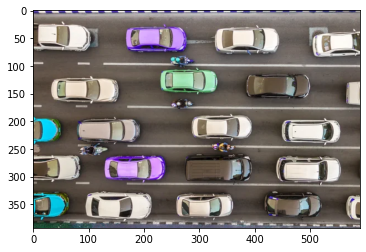

In [4]:
def load_image(path):
  image = cv2.imread(path)
  plt.imshow(image)

  return image

image = load_image("/content/img5.jpg")

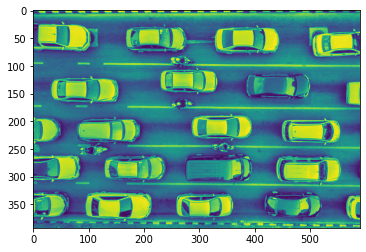

In [5]:
def gray_clahe(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  clh = clahe.apply(gray)
  plt.imshow(clh)

  return clh

clh = gray_clahe(image)

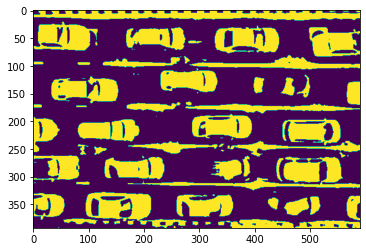

In [6]:
def blur_thresh(image):
  blurred = cv2.GaussianBlur(image, (7, 7), 0)
  thresh = cv2.threshold(blurred, 130, 255, cv2.THRESH_BINARY)[1]

  plt.imshow(thresh)

  return thresh

thresh = blur_thresh(clh)

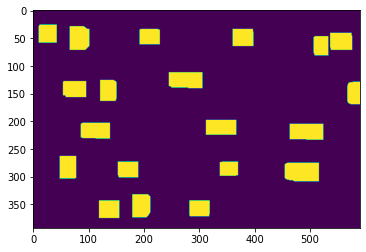

In [7]:
def open_image(image):
  strc_elem = np.ones((25,25))

  opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, strc_elem)
  plt.imshow(opened)

  return opened

opened = open_image(thresh)

In [8]:
print( cv2.__version__)

4.6.0


In [23]:
import imutils

def find_contours(image, mode):
	cnts = cv2.findContours(image.copy(), mode,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
 
	return cnts

In [ ]:
cnts = find_contours(opened, cv2.RETR_EXTERNAL)

In [10]:
print(len(cnts))

20


## Shape detection

In [25]:
def detect(c):
  # initialize the shape name and approximate the contour
  shape = "unidentified"
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.04 * peri, True)
  return str(len(approx))


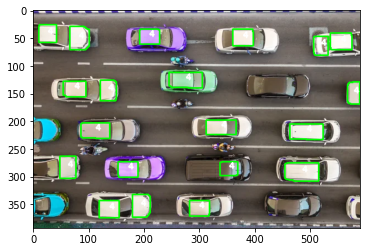

In [19]:
for c in cnts : 
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
 
  shape = detect(c)

  cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
  cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
  
  plt.imshow(image)

Implement this function to detect shapes and number of cars in an input image.

In [22]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()

    clh = gray_clahe(image)
    
    thresh = blur_thresh(clh)

    opened = open_image (thresh)

    cnts = find_contours(opened,cv2.RETR_EXTERNAL)

    for c in cnts : 
      M = cv2.moments(c)
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
    
      shape = detect(c)

      cv2.drawContours(result, [c], -1, (0, 255, 0), 2)
      cv2.putText(result, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (255, 255, 255), 2)
      
      plt.imshow(result)

    cars_num = len(cnts)
    
    #Write your code here
    
    
    return result,cars_num

Test your implementation (don't change this cell).

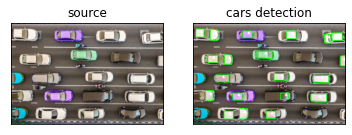

In [23]:
image_list = []
image = cv2.imread('/content/img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

## Second part

Implement this function to detect shapes and number of flowers in an input image.

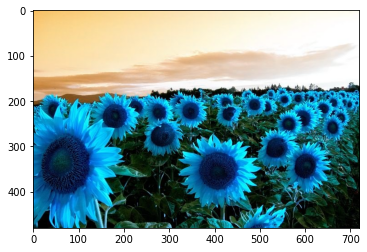

In [60]:
im = cv2.imread("/content/img6.jpg")
plt.imshow(im)

In [17]:
def show_channels(channels):
  f, axarr = plt.subplots(1, 3)
  
  for i in range(len(channels)):
    axarr[i].imshow(channels[i], cmap = "gray")
    axarr[i].axis('off')
  
  plt.show()


In [18]:
blue = im[:,:,0]
green = im[:,:,1]
red = im[:,:,2]

channels = [
    blue , green ,red
]

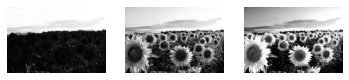

In [19]:
show_channels(channels)

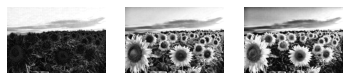

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

clahe_applied = []

for ch in channels : 
  clh = clahe.apply(ch)
  clahe_applied.append(clh)

show_channels(clahe_applied)

In [35]:
from scipy import ndimage, misc

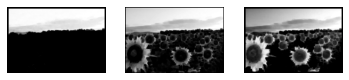

In [68]:
kernel_size = 10

channels_dilated = []

for ch in channels :

  ascent = misc.ascent()
  res = ndimage.minimum_filter(ch , size=kernel_size , mode='constant')

  channels_dilated.append(res)

show_channels(channels_dilated)

In [ ]:
cnts = find_contours(channels_dilated[2] , cv2.RETR_EXTERNAL)

for c in cnts : 
  M = cv2.moments(c)
  # cX = int(M["m10"] / M["m00"])
  # cY = int(M["m01"] / M["m00"])

  if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
  else:
      cX, cY = 0, 0
 
  shape = detect(c)

  cv2.drawContours(im, [c], -1, (0, 255, 0), 2)
  cv2.putText(im, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
  
  plt.imshow(im)

In [ ]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None
    
    #Write your code here
    
    
    return result,flowers_num

Test your implementation (don't change this cell).

In [ ]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!